In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('./data/处理后数据2.csv')
data['date'] = pd.to_datetime(data['date'], format = '%Y-%m-%d')
data

,date,黄金期货价格,论坛情绪值
0,2014-08-11,260.55,0.0
1,2014-08-12,261.00,1.0
2,2014-08-13,261.05,0.0
3,2014-08-14,261.65,0.0
4,2014-08-15,261.40,1.0
...,...,...,...
2430,2024-08-05,559.94,1.0
2431,2024-08-06,554.18,0.0
2432,2024-08-07,556.06,0.0
2433,2024-08-08,556.10,1.0


In [4]:
data1 = pd.read_csv('./data/美元指数.csv')
data1

,date,收盘,开盘,高,低,交易量,涨跌幅
0,2024年10月07日,102.47,102.53,102.54,102.43,NaN,-0.06%
1,2024年10月06日,102.53,102.49,102.60,102.49,NaN,0.01%
2,2024年10月04日,102.52,101.91,102.69,101.81,NaN,0.52%
3,2024年10月03日,101.99,101.64,102.10,101.63,NaN,0.30%
4,2024年10月02日,101.68,101.24,101.69,101.16,NaN,0.48%
...,...,...,...,...,...,...,...
2807,2014年1月07日,80.83,80.69,80.95,80.60,NaN,0.22%
2808,2014年1月06日,80.65,80.86,80.91,80.54,NaN,-0.17%
2809,2014年1月03日,80.79,80.57,80.89,80.49,NaN,0.20%
2810,2014年1月02日,80.63,80.12,80.71,80.08,NaN,0.75%


In [5]:
data1['date'] = pd.to_datetime(data1['date'], format = '%Y年%m月%d日')
data1 = data1.sort_values(by='date')
data1.reset_index(drop = True,inplace = True)
data1

,date,收盘,开盘,高,低,交易量,涨跌幅
0,2014-01-01,80.03,80.21,80.24,80.10,NaN,0.00%
1,2014-01-02,80.63,80.12,80.71,80.08,NaN,0.75%
2,2014-01-03,80.79,80.57,80.89,80.49,NaN,0.20%
3,2014-01-06,80.65,80.86,80.91,80.54,NaN,-0.17%
4,2014-01-07,80.83,80.69,80.95,80.60,NaN,0.22%
...,...,...,...,...,...,...,...
2807,2024-10-02,101.68,101.24,101.69,101.16,NaN,0.48%
2808,2024-10-03,101.99,101.64,102.10,101.63,NaN,0.30%
2809,2024-10-04,102.52,101.91,102.69,101.81,NaN,0.52%
2810,2024-10-06,102.53,102.49,102.60,102.49,NaN,0.01%


In [6]:
data1 = data1[['date','收盘']]
data1.rename(columns={'收盘':'美元指数'}, inplace=True)
data1

,date,美元指数
0,2014-01-01,80.03
1,2014-01-02,80.63
2,2014-01-03,80.79
3,2014-01-06,80.65
4,2014-01-07,80.83
...,...,...
2807,2024-10-02,101.68
2808,2024-10-03,101.99
2809,2024-10-04,102.52
2810,2024-10-06,102.53


In [7]:
data = pd.merge(data,data1,how='left',on='date')
data

,date,黄金期货价格,论坛情绪值,美元指数
0,2014-08-11,260.55,0.0,81.47
1,2014-08-12,261.00,1.0,81.50
2,2014-08-13,261.05,0.0,81.60
3,2014-08-14,261.65,0.0,81.59
4,2014-08-15,261.40,1.0,81.42
...,...,...,...,...
2430,2024-08-05,559.94,1.0,102.69
2431,2024-08-06,554.18,0.0,102.97
2432,2024-08-07,556.06,0.0,103.20
2433,2024-08-08,556.10,1.0,103.21


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2435 entries, 0 to 2434
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2435 non-null   datetime64[ns]
 1   黄金期货价格  2435 non-null   float64       
 2   论坛情绪值   2435 non-null   float64       
 3   美元指数    2432 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 95.1 KB


In [9]:
data = data.fillna(method='ffill')
data

,date,黄金期货价格,论坛情绪值,美元指数
0,2014-08-11,260.55,0.0,81.47
1,2014-08-12,261.00,1.0,81.50
2,2014-08-13,261.05,0.0,81.60
3,2014-08-14,261.65,0.0,81.59
4,2014-08-15,261.40,1.0,81.42
...,...,...,...,...
2430,2024-08-05,559.94,1.0,102.69
2431,2024-08-06,554.18,0.0,102.97
2432,2024-08-07,556.06,0.0,103.20
2433,2024-08-08,556.10,1.0,103.21


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2435 entries, 0 to 2434
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2435 non-null   datetime64[ns]
 1   黄金期货价格  2435 non-null   float64       
 2   论坛情绪值   2435 non-null   float64       
 3   美元指数    2435 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 95.1 KB


In [11]:
data1 = pd.read_csv('./data/WTI原油价格.csv')
data1

,date,收盘,开盘,高,低,交易量,涨跌幅
0,2024年10月07日,74.16,73.89,74.22,73.78,NaN,0.34%
1,2024年10月06日,73.91,74.04,74.16,73.63,NaN,-0.63%
2,2024年10月04日,74.38,73.95,75.57,73.46,428.82K,0.91%
3,2024年10月03日,73.71,70.98,74.09,70.52,460.55K,5.15%
4,2024年10月02日,70.10,70.80,72.49,69.87,429.23K,0.39%
...,...,...,...,...,...,...,...
2832,2014年1月07日,93.67,93.60,94.22,93.35,177.18K,0.26%
2833,2014年1月06日,93.43,94.18,94.59,93.20,189.38K,-0.56%
2834,2014年1月03日,93.96,95.47,95.74,93.86,215.52K,-1.55%
2835,2014年1月02日,95.44,98.50,98.97,95.34,251.25K,-3.30%


In [12]:
data1['date'] = pd.to_datetime(data1['date'], format = '%Y年%m月%d日')
data1 = data1.sort_values(by='date')
data1.reset_index(drop = True,inplace = True)
data1

,date,收盘,开盘,高,低,交易量,涨跌幅
0,2014-01-01,98.70,98.61,98.76,98.54,NaN,0.28%
1,2014-01-02,95.44,98.50,98.97,95.34,251.25K,-3.30%
2,2014-01-03,93.96,95.47,95.74,93.86,215.52K,-1.55%
3,2014-01-06,93.43,94.18,94.59,93.20,189.38K,-0.56%
4,2014-01-07,93.67,93.60,94.22,93.35,177.18K,0.26%
...,...,...,...,...,...,...,...
2832,2024-10-02,70.10,70.80,72.49,69.87,429.23K,0.39%
2833,2024-10-03,73.71,70.98,74.09,70.52,460.55K,5.15%
2834,2024-10-04,74.38,73.95,75.57,73.46,428.82K,0.91%
2835,2024-10-06,73.91,74.04,74.16,73.63,NaN,-0.63%


In [13]:
data1 = data1[['date','收盘']]
data1.rename(columns={'收盘':'WTI原油'}, inplace=True)
data1

,date,WTI原油
0,2014-01-01,98.70
1,2014-01-02,95.44
2,2014-01-03,93.96
3,2014-01-06,93.43
4,2014-01-07,93.67
...,...,...
2832,2024-10-02,70.10
2833,2024-10-03,73.71
2834,2024-10-04,74.38
2835,2024-10-06,73.91


In [14]:
data = pd.merge(data,data1,how='left',on='date')
data

,date,黄金期货价格,论坛情绪值,美元指数,WTI原油
0,2014-08-11,260.55,0.0,81.47,98.08
1,2014-08-12,261.00,1.0,81.50,97.37
2,2014-08-13,261.05,0.0,81.60,97.59
3,2014-08-14,261.65,0.0,81.59,95.58
4,2014-08-15,261.40,1.0,81.42,97.35
...,...,...,...,...,...
2430,2024-08-05,559.94,1.0,102.69,72.94
2431,2024-08-06,554.18,0.0,102.97,73.20
2432,2024-08-07,556.06,0.0,103.20,75.23
2433,2024-08-08,556.10,1.0,103.21,76.19


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2435 entries, 0 to 2434
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2435 non-null   datetime64[ns]
 1   黄金期货价格  2435 non-null   float64       
 2   论坛情绪值   2435 non-null   float64       
 3   美元指数    2435 non-null   float64       
 4   WTI原油   2423 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 114.1 KB


In [16]:
data = data.fillna(method='ffill')
data

,date,黄金期货价格,论坛情绪值,美元指数,WTI原油
0,2014-08-11,260.55,0.0,81.47,98.08
1,2014-08-12,261.00,1.0,81.50,97.37
2,2014-08-13,261.05,0.0,81.60,97.59
3,2014-08-14,261.65,0.0,81.59,95.58
4,2014-08-15,261.40,1.0,81.42,97.35
...,...,...,...,...,...
2430,2024-08-05,559.94,1.0,102.69,72.94
2431,2024-08-06,554.18,0.0,102.97,73.20
2432,2024-08-07,556.06,0.0,103.20,75.23
2433,2024-08-08,556.10,1.0,103.21,76.19


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2435 entries, 0 to 2434
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2435 non-null   datetime64[ns]
 1   黄金期货价格  2435 non-null   float64       
 2   论坛情绪值   2435 non-null   float64       
 3   美元指数    2435 non-null   float64       
 4   WTI原油   2435 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 114.1 KB


In [18]:
data1 = pd.read_csv('./data/道琼斯指数.csv')
data1

,date,收盘,开盘,高,低,交易量,涨跌幅
0,2024年10月04日,"42,352.75","42,248.26","42,361.38","41,972.11",296.55M,0.81%
1,2024年10月03日,"42,011.59","42,099.53","42,125.84","41,847.81",267.27M,-0.44%
2,2024年10月02日,"42,196.52","42,125.14","42,259.52","41,968.79",301.77M,0.09%
3,2024年10月01日,"42,156.97","42,262.97","42,322.36","41,945.63",380.24M,-0.41%
4,2024年9月30日,"42,330.15","42,289.75","42,347.66","41,929.07",354.43M,0.04%
...,...,...,...,...,...,...,...
2703,2014年1月08日,"16,462.74","16,527.66","16,528.88","16,416.69",103.26M,-0.41%
2704,2014年1月07日,"16,530.94","16,429.02","16,562.32","16,429.02",81.27M,0.64%
2705,2014年1月06日,"16,425.10","16,474.04","16,532.99","16,405.52",89.38M,-0.27%
2706,2014年1月03日,"16,469.99","16,456.89","16,518.74","16,439.30",72.77M,0.17%


In [19]:
data1['date'] = pd.to_datetime(data1['date'], format = '%Y年%m月%d日')
data1 = data1.sort_values(by='date')
data1.reset_index(drop = True,inplace = True)
data1

,date,收盘,开盘,高,低,交易量,涨跌幅
0,2014-01-02,"16,441.35","16,572.17","16,573.07","16,416.49",80.96M,-0.82%
1,2014-01-03,"16,469.99","16,456.89","16,518.74","16,439.30",72.77M,0.17%
2,2014-01-06,"16,425.10","16,474.04","16,532.99","16,405.52",89.38M,-0.27%
3,2014-01-07,"16,530.94","16,429.02","16,562.32","16,429.02",81.27M,0.64%
4,2014-01-08,"16,462.74","16,527.66","16,528.88","16,416.69",103.26M,-0.41%
...,...,...,...,...,...,...,...
2703,2024-09-30,"42,330.15","42,289.75","42,347.66","41,929.07",354.43M,0.04%
2704,2024-10-01,"42,156.97","42,262.97","42,322.36","41,945.63",380.24M,-0.41%
2705,2024-10-02,"42,196.52","42,125.14","42,259.52","41,968.79",301.77M,0.09%
2706,2024-10-03,"42,011.59","42,099.53","42,125.84","41,847.81",267.27M,-0.44%


In [20]:
data1 = data1[['date','收盘']]
data1.rename(columns={'收盘':'道琼斯指数'}, inplace=True)
data1

,date,道琼斯指数
0,2014-01-02,"16,441.35"
1,2014-01-03,"16,469.99"
2,2014-01-06,"16,425.10"
3,2014-01-07,"16,530.94"
4,2014-01-08,"16,462.74"
...,...,...
2703,2024-09-30,"42,330.15"
2704,2024-10-01,"42,156.97"
2705,2024-10-02,"42,196.52"
2706,2024-10-03,"42,011.59"


In [21]:
data = pd.merge(data,data1,how='left',on='date')
data

,date,黄金期货价格,论坛情绪值,美元指数,WTI原油,道琼斯指数
0,2014-08-11,260.55,0.0,81.47,98.08,"16,569.98"
1,2014-08-12,261.00,1.0,81.50,97.37,"16,560.54"
2,2014-08-13,261.05,0.0,81.60,97.59,"16,651.80"
3,2014-08-14,261.65,0.0,81.59,95.58,"16,713.58"
4,2014-08-15,261.40,1.0,81.42,97.35,"16,662.91"
...,...,...,...,...,...,...
2430,2024-08-05,559.94,1.0,102.69,72.94,"38,703.27"
2431,2024-08-06,554.18,0.0,102.97,73.20,"38,997.66"
2432,2024-08-07,556.06,0.0,103.20,75.23,"38,763.45"
2433,2024-08-08,556.10,1.0,103.21,76.19,"39,446.49"


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2435 entries, 0 to 2434
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2435 non-null   datetime64[ns]
 1   黄金期货价格  2435 non-null   float64       
 2   论坛情绪值   2435 non-null   float64       
 3   美元指数    2435 non-null   float64       
 4   WTI原油   2435 non-null   float64       
 5   道琼斯指数   2353 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 133.2+ KB


In [23]:
data = data.fillna(method='ffill')
data

,date,黄金期货价格,论坛情绪值,美元指数,WTI原油,道琼斯指数
0,2014-08-11,260.55,0.0,81.47,98.08,"16,569.98"
1,2014-08-12,261.00,1.0,81.50,97.37,"16,560.54"
2,2014-08-13,261.05,0.0,81.60,97.59,"16,651.80"
3,2014-08-14,261.65,0.0,81.59,95.58,"16,713.58"
4,2014-08-15,261.40,1.0,81.42,97.35,"16,662.91"
...,...,...,...,...,...,...
2430,2024-08-05,559.94,1.0,102.69,72.94,"38,703.27"
2431,2024-08-06,554.18,0.0,102.97,73.20,"38,997.66"
2432,2024-08-07,556.06,0.0,103.20,75.23,"38,763.45"
2433,2024-08-08,556.10,1.0,103.21,76.19,"39,446.49"


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2435 entries, 0 to 2434
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2435 non-null   datetime64[ns]
 1   黄金期货价格  2435 non-null   float64       
 2   论坛情绪值   2435 non-null   float64       
 3   美元指数    2435 non-null   float64       
 4   WTI原油   2435 non-null   float64       
 5   道琼斯指数   2435 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 133.2+ KB


In [25]:
data1 = pd.read_csv('./data/美国标准普尔500指数.csv')
data1

,date,收盘,开盘,高,低,交易量,涨跌幅
0,2024年10月04日,"5,751.07","5,737.48","5,753.21","5,702.83",NaN,0.90%
1,2024年10月03日,"5,699.94","5,698.19","5,718.78","5,677.37",NaN,-0.17%
2,2024年10月02日,"5,709.54","5,698.14","5,719.63","5,674.00",NaN,0.01%
3,2024年10月01日,"5,708.75","5,757.73","5,757.73","5,681.28",NaN,-0.93%
4,2024年9月30日,"5,762.48","5,726.52","5,765.14","5,703.53",NaN,0.42%
...,...,...,...,...,...,...,...
2703,2014年1月08日,"1,837.50","1,837.90","1,840.00","1,831.40",NaN,-0.02%
2704,2014年1月07日,"1,837.90","1,828.70","1,840.10","1,828.70",NaN,0.61%
2705,2014年1月06日,"1,826.80","1,832.30","1,837.20","1,823.70",NaN,-0.25%
2706,2014年1月03日,"1,831.40","1,833.20","1,838.20","1,829.10",NaN,-0.03%


In [26]:
data1['date'] = pd.to_datetime(data1['date'], format = '%Y年%m月%d日')
data1 = data1.sort_values(by='date')
data1.reset_index(drop = True,inplace = True)
data1

,date,收盘,开盘,高,低,交易量,涨跌幅
0,2014-01-02,"1,832.00","1,845.90","1,845.90","1,827.70",NaN,-0.89%
1,2014-01-03,"1,831.40","1,833.20","1,838.20","1,829.10",NaN,-0.03%
2,2014-01-06,"1,826.80","1,832.30","1,837.20","1,823.70",NaN,-0.25%
3,2014-01-07,"1,837.90","1,828.70","1,840.10","1,828.70",NaN,0.61%
4,2014-01-08,"1,837.50","1,837.90","1,840.00","1,831.40",NaN,-0.02%
...,...,...,...,...,...,...,...
2703,2024-09-30,"5,762.48","5,726.52","5,765.14","5,703.53",NaN,0.42%
2704,2024-10-01,"5,708.75","5,757.73","5,757.73","5,681.28",NaN,-0.93%
2705,2024-10-02,"5,709.54","5,698.14","5,719.63","5,674.00",NaN,0.01%
2706,2024-10-03,"5,699.94","5,698.19","5,718.78","5,677.37",NaN,-0.17%


In [27]:
data1 = data1[['date','收盘']]
data1.rename(columns={'收盘':'标普500指数'}, inplace=True)
data1

,date,标普500指数
0,2014-01-02,"1,832.00"
1,2014-01-03,"1,831.40"
2,2014-01-06,"1,826.80"
3,2014-01-07,"1,837.90"
4,2014-01-08,"1,837.50"
...,...,...
2703,2024-09-30,"5,762.48"
2704,2024-10-01,"5,708.75"
2705,2024-10-02,"5,709.54"
2706,2024-10-03,"5,699.94"


In [28]:
data = pd.merge(data,data1,how='left',on='date')
data

,date,黄金期货价格,论坛情绪值,美元指数,WTI原油,道琼斯指数,标普500指数
0,2014-08-11,260.55,0.0,81.47,98.08,"16,569.98","1,936.90"
1,2014-08-12,261.00,1.0,81.50,97.37,"16,560.54","1,933.80"
2,2014-08-13,261.05,0.0,81.60,97.59,"16,651.80","1,946.70"
3,2014-08-14,261.65,0.0,81.59,95.58,"16,713.58","1,955.20"
4,2014-08-15,261.40,1.0,81.42,97.35,"16,662.91","1,955.10"
...,...,...,...,...,...,...,...
2430,2024-08-05,559.94,1.0,102.69,72.94,"38,703.27","5,186.33"
2431,2024-08-06,554.18,0.0,102.97,73.20,"38,997.66","5,240.03"
2432,2024-08-07,556.06,0.0,103.20,75.23,"38,763.45","5,199.50"
2433,2024-08-08,556.10,1.0,103.21,76.19,"39,446.49","5,319.31"


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2435 entries, 0 to 2434
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     2435 non-null   datetime64[ns]
 1   黄金期货价格   2435 non-null   float64       
 2   论坛情绪值    2435 non-null   float64       
 3   美元指数     2435 non-null   float64       
 4   WTI原油    2435 non-null   float64       
 5   道琼斯指数    2435 non-null   object        
 6   标普500指数  2353 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 152.2+ KB


In [30]:
data = data.fillna(method='ffill')
data

,date,黄金期货价格,论坛情绪值,美元指数,WTI原油,道琼斯指数,标普500指数
0,2014-08-11,260.55,0.0,81.47,98.08,"16,569.98","1,936.90"
1,2014-08-12,261.00,1.0,81.50,97.37,"16,560.54","1,933.80"
2,2014-08-13,261.05,0.0,81.60,97.59,"16,651.80","1,946.70"
3,2014-08-14,261.65,0.0,81.59,95.58,"16,713.58","1,955.20"
4,2014-08-15,261.40,1.0,81.42,97.35,"16,662.91","1,955.10"
...,...,...,...,...,...,...,...
2430,2024-08-05,559.94,1.0,102.69,72.94,"38,703.27","5,186.33"
2431,2024-08-06,554.18,0.0,102.97,73.20,"38,997.66","5,240.03"
2432,2024-08-07,556.06,0.0,103.20,75.23,"38,763.45","5,199.50"
2433,2024-08-08,556.10,1.0,103.21,76.19,"39,446.49","5,319.31"


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2435 entries, 0 to 2434
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     2435 non-null   datetime64[ns]
 1   黄金期货价格   2435 non-null   float64       
 2   论坛情绪值    2435 non-null   float64       
 3   美元指数     2435 non-null   float64       
 4   WTI原油    2435 non-null   float64       
 5   道琼斯指数    2435 non-null   object        
 6   标普500指数  2435 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 152.2+ KB


In [32]:
data1 = pd.read_csv('./data/美联储利率.csv')
data1

,商品,date,今值,预测值,前值
0,美联储利率决议,1982-09-28,10.25,NaN,NaN
1,美联储利率决议,1982-10-02,10.00,NaN,10.25
2,美联储利率决议,1982-10-08,9.50,NaN,10.00
3,美联储利率决议,1982-11-20,9.00,NaN,9.50
4,美联储利率决议,1982-12-15,8.50,NaN,9.00
...,...,...,...,...,...
281,美联储利率决议,2024-05-02,5.50,5.50,5.50
282,美联储利率决议,2024-06-13,5.50,5.50,5.50
283,美联储利率决议,2024-08-01,5.50,5.50,5.50
284,美联储利率决议,2024-09-19,5.00,5.25,5.50


In [33]:
data1['date'] = pd.to_datetime(data1['date'], format = '%Y-%m-%d')
data1 = data1.sort_values(by='date')
data1.reset_index(drop = True,inplace = True)
data1

,商品,date,今值,预测值,前值
0,美联储利率决议,1982-09-28,10.25,NaN,NaN
1,美联储利率决议,1982-10-02,10.00,NaN,10.25
2,美联储利率决议,1982-10-08,9.50,NaN,10.00
3,美联储利率决议,1982-11-20,9.00,NaN,9.50
4,美联储利率决议,1982-12-15,8.50,NaN,9.00
...,...,...,...,...,...
281,美联储利率决议,2024-05-02,5.50,5.50,5.50
282,美联储利率决议,2024-06-13,5.50,5.50,5.50
283,美联储利率决议,2024-08-01,5.50,5.50,5.50
284,美联储利率决议,2024-09-19,5.00,5.25,5.50


In [34]:
data1 = data1[['date','今值']]
data1.rename(columns={'今值':'美联储利率'}, inplace=True)
data1

,date,美联储利率
0,1982-09-28,10.25
1,1982-10-02,10.00
2,1982-10-08,9.50
3,1982-11-20,9.00
4,1982-12-15,8.50
...,...,...
281,2024-05-02,5.50
282,2024-06-13,5.50
283,2024-08-01,5.50
284,2024-09-19,5.00


In [35]:
date_range = pd.date_range('2014-07-01', '2024-08-31')
date_range

DatetimeIndex(['2014-07-01', '2014-07-02', '2014-07-03', '2014-07-04',
               '2014-07-05', '2014-07-06', '2014-07-07', '2014-07-08',
               '2014-07-09', '2014-07-10',
               ...
               '2024-08-22', '2024-08-23', '2024-08-24', '2024-08-25',
               '2024-08-26', '2024-08-27', '2024-08-28', '2024-08-29',
               '2024-08-30', '2024-08-31'],
              dtype='datetime64[ns]', length=3715, freq='D')

In [36]:
date_range = pd.DataFrame(date_range, columns=['date'])
date_range

,date
0,2014-07-01
1,2014-07-02
2,2014-07-03
3,2014-07-04
4,2014-07-05
...,...
3710,2024-08-27
3711,2024-08-28
3712,2024-08-29
3713,2024-08-30


In [37]:
data1 = pd.merge(date_range,data1,how='left',on='date')
data1

,date,美联储利率
0,2014-07-01,NaN
1,2014-07-02,NaN
2,2014-07-03,NaN
3,2014-07-04,NaN
4,2014-07-05,NaN
...,...,...
3710,2024-08-27,NaN
3711,2024-08-28,NaN
3712,2024-08-29,NaN
3713,2024-08-30,NaN


In [38]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3715 entries, 0 to 3714
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    3715 non-null   datetime64[ns]
 1   美联储利率   82 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 87.1 KB


In [39]:
data1 = data1.fillna(method='ffill')
data1

,date,美联储利率
0,2014-07-01,NaN
1,2014-07-02,NaN
2,2014-07-03,NaN
3,2014-07-04,NaN
4,2014-07-05,NaN
...,...,...
3710,2024-08-27,5.5
3711,2024-08-28,5.5
3712,2024-08-29,5.5
3713,2024-08-30,5.5


In [40]:
data = pd.merge(data,data1,how='left',on='date')
data

,date,黄金期货价格,论坛情绪值,美元指数,WTI原油,道琼斯指数,标普500指数,美联储利率
0,2014-08-11,260.55,0.0,81.47,98.08,"16,569.98","1,936.90",0.25
1,2014-08-12,261.00,1.0,81.50,97.37,"16,560.54","1,933.80",0.25
2,2014-08-13,261.05,0.0,81.60,97.59,"16,651.80","1,946.70",0.25
3,2014-08-14,261.65,0.0,81.59,95.58,"16,713.58","1,955.20",0.25
4,2014-08-15,261.40,1.0,81.42,97.35,"16,662.91","1,955.10",0.25
...,...,...,...,...,...,...,...,...
2430,2024-08-05,559.94,1.0,102.69,72.94,"38,703.27","5,186.33",5.50
2431,2024-08-06,554.18,0.0,102.97,73.20,"38,997.66","5,240.03",5.50
2432,2024-08-07,556.06,0.0,103.20,75.23,"38,763.45","5,199.50",5.50
2433,2024-08-08,556.10,1.0,103.21,76.19,"39,446.49","5,319.31",5.50


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2435 entries, 0 to 2434
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     2435 non-null   datetime64[ns]
 1   黄金期货价格   2435 non-null   float64       
 2   论坛情绪值    2435 non-null   float64       
 3   美元指数     2435 non-null   float64       
 4   WTI原油    2435 non-null   float64       
 5   道琼斯指数    2435 non-null   object        
 6   标普500指数  2435 non-null   object        
 7   美联储利率    2435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 171.2+ KB


In [42]:
data1 = pd.read_csv('./data/美国CPI月率.csv')
data1

,商品,date,今值,预测值,前值
0,美国CPI月率,1970-01-01,0.5,NaN,NaN
1,美国CPI月率,1970-02-01,0.5,NaN,0.5
2,美国CPI月率,1970-03-01,0.5,NaN,0.5
3,美国CPI月率,1970-04-01,0.5,NaN,0.5
4,美国CPI月率,1970-05-01,0.5,NaN,0.5
...,...,...,...,...,...
653,美国CPI月率,2024-06-12,0.0,0.1,0.3
654,美国CPI月率,2024-07-11,-0.1,0.1,0.0
655,美国CPI月率,2024-08-14,0.2,0.2,-0.1
656,美国CPI月率,2024-09-11,0.2,0.2,0.2


In [43]:
data1['date'] = pd.to_datetime(data1['date'], format = '%Y-%m-%d')
data1 = data1.sort_values(by='date')
data1.reset_index(drop = True,inplace = True)
data1

,商品,date,今值,预测值,前值
0,美国CPI月率,1970-01-01,0.5,NaN,NaN
1,美国CPI月率,1970-02-01,0.5,NaN,0.5
2,美国CPI月率,1970-03-01,0.5,NaN,0.5
3,美国CPI月率,1970-04-01,0.5,NaN,0.5
4,美国CPI月率,1970-05-01,0.5,NaN,0.5
...,...,...,...,...,...
653,美国CPI月率,2024-06-12,0.0,0.1,0.3
654,美国CPI月率,2024-07-11,-0.1,0.1,0.0
655,美国CPI月率,2024-08-14,0.2,0.2,-0.1
656,美国CPI月率,2024-09-11,0.2,0.2,0.2


In [44]:
data1 = data1[['date','今值']]
data1.rename(columns={'今值':'美国CPI月率'}, inplace=True)
data1

,date,美国CPI月率
0,1970-01-01,0.5
1,1970-02-01,0.5
2,1970-03-01,0.5
3,1970-04-01,0.5
4,1970-05-01,0.5
...,...,...
653,2024-06-12,0.0
654,2024-07-11,-0.1
655,2024-08-14,0.2
656,2024-09-11,0.2


In [45]:
date_range = pd.date_range('2014-07-01', '2024-08-31')
date_range

DatetimeIndex(['2014-07-01', '2014-07-02', '2014-07-03', '2014-07-04',
               '2014-07-05', '2014-07-06', '2014-07-07', '2014-07-08',
               '2014-07-09', '2014-07-10',
               ...
               '2024-08-22', '2024-08-23', '2024-08-24', '2024-08-25',
               '2024-08-26', '2024-08-27', '2024-08-28', '2024-08-29',
               '2024-08-30', '2024-08-31'],
              dtype='datetime64[ns]', length=3715, freq='D')

In [46]:
date_range = pd.DataFrame(date_range, columns=['date'])
date_range

,date
0,2014-07-01
1,2014-07-02
2,2014-07-03
3,2014-07-04
4,2014-07-05
...,...
3710,2024-08-27
3711,2024-08-28
3712,2024-08-29
3713,2024-08-30


In [47]:
data1 = pd.merge(date_range,data1,how='left',on='date')
data1

,date,美国CPI月率
0,2014-07-01,NaN
1,2014-07-02,NaN
2,2014-07-03,NaN
3,2014-07-04,NaN
4,2014-07-05,NaN
...,...,...
3710,2024-08-27,NaN
3711,2024-08-28,NaN
3712,2024-08-29,NaN
3713,2024-08-30,NaN


In [48]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3715 entries, 0 to 3714
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     3715 non-null   datetime64[ns]
 1   美国CPI月率  122 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 87.1 KB


In [49]:
data1 = data1.fillna(method='ffill')
data1

,date,美国CPI月率
0,2014-07-01,NaN
1,2014-07-02,NaN
2,2014-07-03,NaN
3,2014-07-04,NaN
4,2014-07-05,NaN
...,...,...
3710,2024-08-27,0.2
3711,2024-08-28,0.2
3712,2024-08-29,0.2
3713,2024-08-30,0.2


In [50]:
data = pd.merge(data,data1,how='left',on='date')
data

,date,黄金期货价格,论坛情绪值,美元指数,WTI原油,道琼斯指数,标普500指数,美联储利率,美国CPI月率
0,2014-08-11,260.55,0.0,81.47,98.08,"16,569.98","1,936.90",0.25,0.3
1,2014-08-12,261.00,1.0,81.50,97.37,"16,560.54","1,933.80",0.25,0.3
2,2014-08-13,261.05,0.0,81.60,97.59,"16,651.80","1,946.70",0.25,0.3
3,2014-08-14,261.65,0.0,81.59,95.58,"16,713.58","1,955.20",0.25,0.3
4,2014-08-15,261.40,1.0,81.42,97.35,"16,662.91","1,955.10",0.25,0.3
...,...,...,...,...,...,...,...,...,...
2430,2024-08-05,559.94,1.0,102.69,72.94,"38,703.27","5,186.33",5.50,-0.1
2431,2024-08-06,554.18,0.0,102.97,73.20,"38,997.66","5,240.03",5.50,-0.1
2432,2024-08-07,556.06,0.0,103.20,75.23,"38,763.45","5,199.50",5.50,-0.1
2433,2024-08-08,556.10,1.0,103.21,76.19,"39,446.49","5,319.31",5.50,-0.1


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2435 entries, 0 to 2434
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     2435 non-null   datetime64[ns]
 1   黄金期货价格   2435 non-null   float64       
 2   论坛情绪值    2435 non-null   float64       
 3   美元指数     2435 non-null   float64       
 4   WTI原油    2435 non-null   float64       
 5   道琼斯指数    2435 non-null   object        
 6   标普500指数  2435 non-null   object        
 7   美联储利率    2435 non-null   float64       
 8   美国CPI月率  2435 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 190.2+ KB


In [52]:
data1 = pd.read_csv('./data/GPR.csv')
data1

,date,GPR
0,1985/1/1,102.17
1,1985/2/1,117.10
2,1985/3/1,124.78
3,1985/4/1,87.93
4,1985/5/1,103.26
...,...,...
472,2024/5/1,128.93
473,2024/6/1,112.03
474,2024/7/1,91.42
475,2024/8/1,137.93


In [53]:
data1['date'] = pd.to_datetime(data1['date'], format = '%Y-%m-%d')
data1 = data1.sort_values(by='date')
data1.reset_index(drop = True,inplace = True)
data1

,date,GPR
0,1985-01-01,102.17
1,1985-02-01,117.10
2,1985-03-01,124.78
3,1985-04-01,87.93
4,1985-05-01,103.26
...,...,...
472,2024-05-01,128.93
473,2024-06-01,112.03
474,2024-07-01,91.42
475,2024-08-01,137.93


In [54]:
date_range = pd.date_range('2014-07-01', '2024-08-31')
date_range = pd.DataFrame(date_range, columns=['date'])
date_range

,date
0,2014-07-01
1,2014-07-02
2,2014-07-03
3,2014-07-04
4,2014-07-05
...,...
3710,2024-08-27
3711,2024-08-28
3712,2024-08-29
3713,2024-08-30


In [55]:
data1 = pd.merge(date_range,data1,how='left',on='date')
data1

,date,GPR
0,2014-07-01,138.75
1,2014-07-02,NaN
2,2014-07-03,NaN
3,2014-07-04,NaN
4,2014-07-05,NaN
...,...,...
3710,2024-08-27,NaN
3711,2024-08-28,NaN
3712,2024-08-29,NaN
3713,2024-08-30,NaN


In [56]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3715 entries, 0 to 3714
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    3715 non-null   datetime64[ns]
 1   GPR     122 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 87.1 KB


In [57]:
data1 = data1.fillna(method='ffill')
data1

,date,GPR
0,2014-07-01,138.75
1,2014-07-02,138.75
2,2014-07-03,138.75
3,2014-07-04,138.75
4,2014-07-05,138.75
...,...,...
3710,2024-08-27,137.93
3711,2024-08-28,137.93
3712,2024-08-29,137.93
3713,2024-08-30,137.93


In [58]:
data = pd.merge(data,data1,how='left',on='date')
data

,date,黄金期货价格,论坛情绪值,美元指数,WTI原油,道琼斯指数,标普500指数,美联储利率,美国CPI月率,GPR
0,2014-08-11,260.55,0.0,81.47,98.08,"16,569.98","1,936.90",0.25,0.3,136.45
1,2014-08-12,261.00,1.0,81.50,97.37,"16,560.54","1,933.80",0.25,0.3,136.45
2,2014-08-13,261.05,0.0,81.60,97.59,"16,651.80","1,946.70",0.25,0.3,136.45
3,2014-08-14,261.65,0.0,81.59,95.58,"16,713.58","1,955.20",0.25,0.3,136.45
4,2014-08-15,261.40,1.0,81.42,97.35,"16,662.91","1,955.10",0.25,0.3,136.45
...,...,...,...,...,...,...,...,...,...,...
2430,2024-08-05,559.94,1.0,102.69,72.94,"38,703.27","5,186.33",5.50,-0.1,137.93
2431,2024-08-06,554.18,0.0,102.97,73.20,"38,997.66","5,240.03",5.50,-0.1,137.93
2432,2024-08-07,556.06,0.0,103.20,75.23,"38,763.45","5,199.50",5.50,-0.1,137.93
2433,2024-08-08,556.10,1.0,103.21,76.19,"39,446.49","5,319.31",5.50,-0.1,137.93


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2435 entries, 0 to 2434
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     2435 non-null   datetime64[ns]
 1   黄金期货价格   2435 non-null   float64       
 2   论坛情绪值    2435 non-null   float64       
 3   美元指数     2435 non-null   float64       
 4   WTI原油    2435 non-null   float64       
 5   道琼斯指数    2435 non-null   object        
 6   标普500指数  2435 non-null   object        
 7   美联储利率    2435 non-null   float64       
 8   美国CPI月率  2435 non-null   float64       
 9   GPR      2435 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 209.3+ KB


In [60]:
data1 = pd.read_csv('./data/GEPU.csv')
data1

,date,GEPU_current,GEPU_ppp
0,1997-1-01,74.906462,76.654721
1,1997-2-01,77.952565,80.083908
2,1997-3-01,67.107413,65.378079
3,1997-4-01,72.901168,74.744226
4,1997-5-01,71.803830,73.522410
...,...,...,...
327,2024-04-01,185.633997,192.961247
328,2024-05-01,203.278708,211.339583
329,2024-06-01,215.963253,226.197269
330,2024-07-01,233.986646,245.999719


In [61]:
data1['date'] = pd.to_datetime(data1['date'], format = '%Y-%m-%d')
data1 = data1.sort_values(by='date')
data1.reset_index(drop = True,inplace = True)
data1

,date,GEPU_current,GEPU_ppp
0,1997-01-01,74.906462,76.654721
1,1997-02-01,77.952565,80.083908
2,1997-03-01,67.107413,65.378079
3,1997-04-01,72.901168,74.744226
4,1997-05-01,71.803830,73.522410
...,...,...,...
327,2024-04-01,185.633997,192.961247
328,2024-05-01,203.278708,211.339583
329,2024-06-01,215.963253,226.197269
330,2024-07-01,233.986646,245.999719


In [62]:
date_range = pd.date_range('2014-07-01', '2024-08-31')
date_range = pd.DataFrame(date_range, columns=['date'])
date_range

,date
0,2014-07-01
1,2014-07-02
2,2014-07-03
3,2014-07-04
4,2014-07-05
...,...
3710,2024-08-27
3711,2024-08-28
3712,2024-08-29
3713,2024-08-30


In [63]:
data1 = pd.merge(date_range,data1,how='left',on='date')
data1

,date,GEPU_current,GEPU_ppp
0,2014-07-01,93.180607,97.241974
1,2014-07-02,NaN,NaN
2,2014-07-03,NaN,NaN
3,2014-07-04,NaN,NaN
4,2014-07-05,NaN,NaN
...,...,...,...
3710,2024-08-27,NaN,NaN
3711,2024-08-28,NaN,NaN
3712,2024-08-29,NaN,NaN
3713,2024-08-30,NaN,NaN


In [64]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3715 entries, 0 to 3714
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          3715 non-null   datetime64[ns]
 1   GEPU_current  122 non-null    float64       
 2   GEPU_ppp      122 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 116.1 KB


In [65]:
data1 = data1.fillna(method='ffill')
data1

,date,GEPU_current,GEPU_ppp
0,2014-07-01,93.180607,97.241974
1,2014-07-02,93.180607,97.241974
2,2014-07-03,93.180607,97.241974
3,2014-07-04,93.180607,97.241974
4,2014-07-05,93.180607,97.241974
...,...,...,...
3710,2024-08-27,219.498876,234.359771
3711,2024-08-28,219.498876,234.359771
3712,2024-08-29,219.498876,234.359771
3713,2024-08-30,219.498876,234.359771


In [66]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3715 entries, 0 to 3714
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          3715 non-null   datetime64[ns]
 1   GEPU_current  3715 non-null   float64       
 2   GEPU_ppp      3715 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 116.1 KB


In [67]:
data1 = data1[['date','GEPU_current']]
data1.rename(columns={'GEPU_current':'GEPU'}, inplace=True)
data1

,date,GEPU
0,2014-07-01,93.180607
1,2014-07-02,93.180607
2,2014-07-03,93.180607
3,2014-07-04,93.180607
4,2014-07-05,93.180607
...,...,...
3710,2024-08-27,219.498876
3711,2024-08-28,219.498876
3712,2024-08-29,219.498876
3713,2024-08-30,219.498876


In [68]:
data = pd.merge(data,data1,how='left',on='date')
data

,date,黄金期货价格,论坛情绪值,美元指数,WTI原油,道琼斯指数,标普500指数,美联储利率,美国CPI月率,GPR,GEPU
0,2014-08-11,260.55,0.0,81.47,98.08,"16,569.98","1,936.90",0.25,0.3,136.45,99.641198
1,2014-08-12,261.00,1.0,81.50,97.37,"16,560.54","1,933.80",0.25,0.3,136.45,99.641198
2,2014-08-13,261.05,0.0,81.60,97.59,"16,651.80","1,946.70",0.25,0.3,136.45,99.641198
3,2014-08-14,261.65,0.0,81.59,95.58,"16,713.58","1,955.20",0.25,0.3,136.45,99.641198
4,2014-08-15,261.40,1.0,81.42,97.35,"16,662.91","1,955.10",0.25,0.3,136.45,99.641198
...,...,...,...,...,...,...,...,...,...,...,...
2430,2024-08-05,559.94,1.0,102.69,72.94,"38,703.27","5,186.33",5.50,-0.1,137.93,219.498876
2431,2024-08-06,554.18,0.0,102.97,73.20,"38,997.66","5,240.03",5.50,-0.1,137.93,219.498876
2432,2024-08-07,556.06,0.0,103.20,75.23,"38,763.45","5,199.50",5.50,-0.1,137.93,219.498876
2433,2024-08-08,556.10,1.0,103.21,76.19,"39,446.49","5,319.31",5.50,-0.1,137.93,219.498876


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2435 entries, 0 to 2434
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     2435 non-null   datetime64[ns]
 1   黄金期货价格   2435 non-null   float64       
 2   论坛情绪值    2435 non-null   float64       
 3   美元指数     2435 non-null   float64       
 4   WTI原油    2435 non-null   float64       
 5   道琼斯指数    2435 non-null   object        
 6   标普500指数  2435 non-null   object        
 7   美联储利率    2435 non-null   float64       
 8   美国CPI月率  2435 non-null   float64       
 9   GPR      2435 non-null   float64       
 10  GEPU     2435 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 228.3+ KB


In [70]:
data['道琼斯指数'] = data.道琼斯指数.str.replace(',','')
data['标普500指数'] = data.标普500指数.str.replace(',','')
data['道琼斯指数'] = data['道琼斯指数'].astype(float)
data['标普500指数'] = data['标普500指数'].astype(float)

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2435 entries, 0 to 2434
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     2435 non-null   datetime64[ns]
 1   黄金期货价格   2435 non-null   float64       
 2   论坛情绪值    2435 non-null   float64       
 3   美元指数     2435 non-null   float64       
 4   WTI原油    2435 non-null   float64       
 5   道琼斯指数    2435 non-null   float64       
 6   标普500指数  2435 non-null   float64       
 7   美联储利率    2435 non-null   float64       
 8   美国CPI月率  2435 non-null   float64       
 9   GPR      2435 non-null   float64       
 10  GEPU     2435 non-null   float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 228.3 KB


In [72]:
data.to_csv('./data/训练数据.csv',header=True,index=False)

In [73]:
data.describe()

,黄金期货价格,论坛情绪值,美元指数,WTI原油,道琼斯指数,标普500指数,美联储利率,美国CPI月率,GPR,GEPU
count,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000
mean,339.621885,0.590144,97.375368,62.319179,26690.295392,3205.635290,1.731520,0.225914,106.068435,216.276672
std,84.866638,0.491908,5.265392,18.540923,6932.179294,996.314074,1.794085,0.318258,34.181073,69.037308
min,218.150000,0.000000,81.420000,-37.630000,15666.440000,1859.300000,0.250000,-0.800000,58.420000,99.641198
25%,272.525000,0.000000,93.920000,48.400000,20061.425000,2297.050000,0.250000,0.100000,84.380000,157.424013
50%,328.300000,1.000000,96.930000,59.600000,26062.680000,2905.000000,1.000000,0.200000,102.190000,219.498876
75%,394.790000,1.000000,101.050000,75.270000,33396.675000,4115.735000,2.500000,0.400000,116.720000,262.049900
max,581.560000,1.000000,114.110000,123.700000,41198.080000,5667.200000,5.500000,1.300000,318.950000,431.727914


<AxesSubplot:>

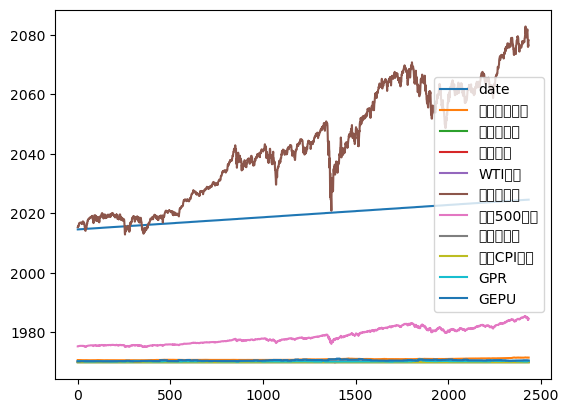

In [74]:
data.plot()

In [75]:
data.index = data.date
data

,date,黄金期货价格,论坛情绪值,美元指数,WTI原油,道琼斯指数,标普500指数,美联储利率,美国CPI月率,GPR,GEPU
date,,,,,,,,,,,
2014-08-11,2014-08-11,260.55,0.0,81.47,98.08,16569.98,1936.90,0.25,0.3,136.45,99.641198
2014-08-12,2014-08-12,261.00,1.0,81.50,97.37,16560.54,1933.80,0.25,0.3,136.45,99.641198
2014-08-13,2014-08-13,261.05,0.0,81.60,97.59,16651.80,1946.70,0.25,0.3,136.45,99.641198
2014-08-14,2014-08-14,261.65,0.0,81.59,95.58,16713.58,1955.20,0.25,0.3,136.45,99.641198
2014-08-15,2014-08-15,261.40,1.0,81.42,97.35,16662.91,1955.10,0.25,0.3,136.45,99.641198
...,...,...,...,...,...,...,...,...,...,...,...
2024-08-05,2024-08-05,559.94,1.0,102.69,72.94,38703.27,5186.33,5.50,-0.1,137.93,219.498876
2024-08-06,2024-08-06,554.18,0.0,102.97,73.20,38997.66,5240.03,5.50,-0.1,137.93,219.498876
2024-08-07,2024-08-07,556.06,0.0,103.20,75.23,38763.45,5199.50,5.50,-0.1,137.93,219.498876


<AxesSubplot:xlabel='date'>

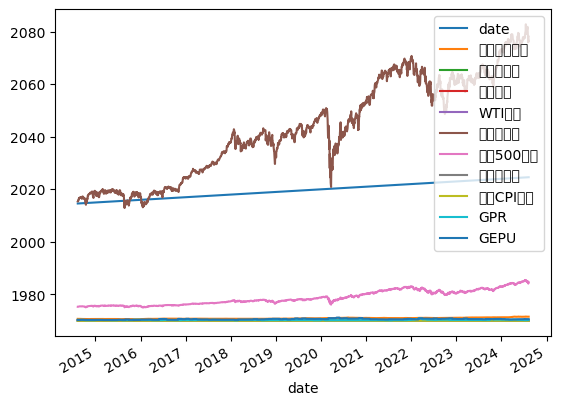

In [76]:
data.plot()

<AxesSubplot:title={'center':'Gold futures prices'}, xlabel='date'>

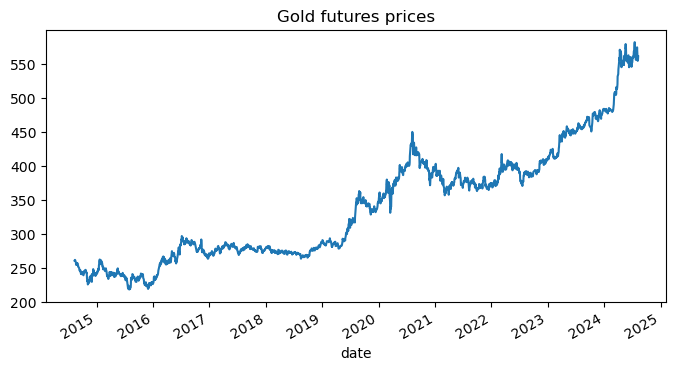

In [77]:
data['黄金期货价格'].plot(title='Gold futures prices',figsize = (8,4))

<AxesSubplot:title={'center':'US dollar index'}, xlabel='date'>

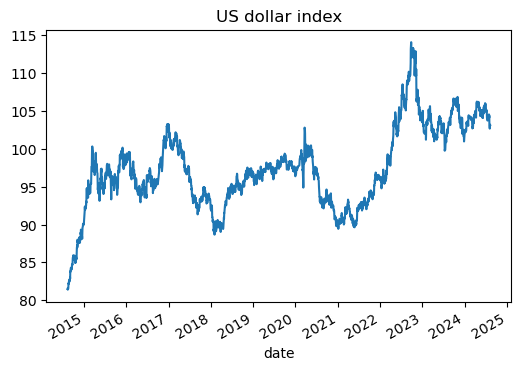

In [93]:
data['美元指数'].plot(title='US dollar index',figsize = (6,4))

<AxesSubplot:title={'center':'WTI crude oil'}, xlabel='date'>

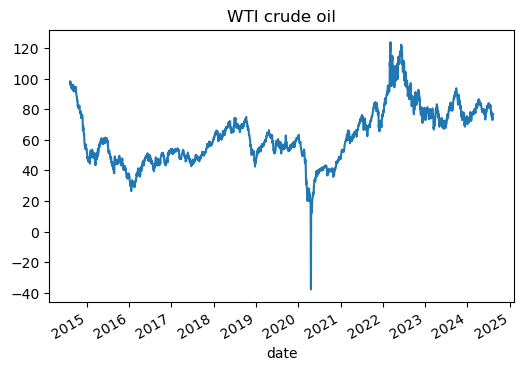

In [94]:
data['WTI原油'].plot(title='WTI crude oil',figsize = (6,4))

<AxesSubplot:title={'center':'Dow Jones Index'}, xlabel='date'>

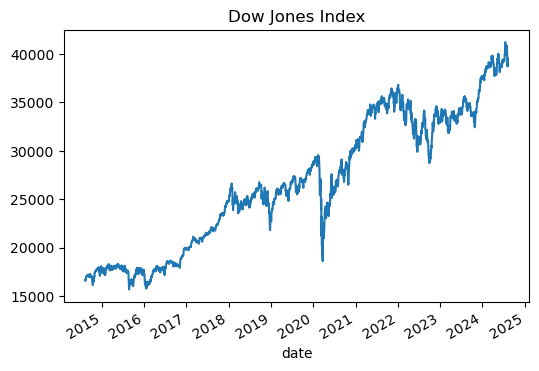

In [95]:
data['道琼斯指数'].plot(title='Dow Jones Index',figsize = (6,4))

<AxesSubplot:title={'center':'S&P 500 Index'}, xlabel='date'>

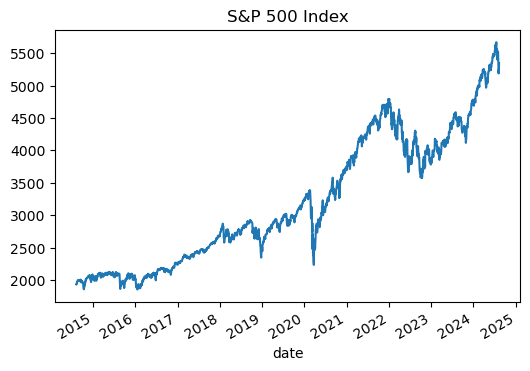

In [96]:
data['标普500指数'].plot(title='S&P 500 Index',figsize = (6,4))

<AxesSubplot:title={'center':'Federal Reserve interest rates'}, xlabel='date'>

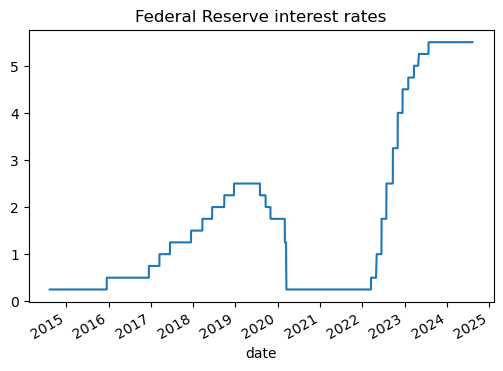

In [97]:
data['美联储利率'].plot(title='Federal Reserve interest rates',figsize = (6,4))

<AxesSubplot:title={'center':'Monthly CPI rate in the United States'}, xlabel='date'>

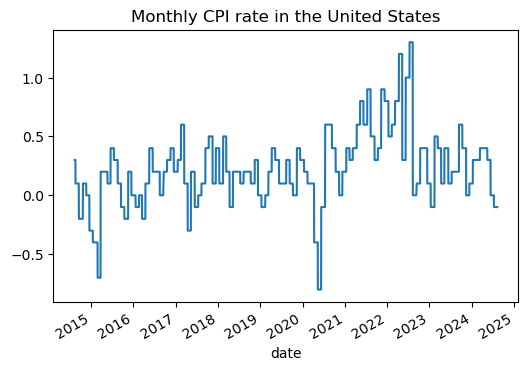

In [98]:
data['美国CPI月率'].plot(title='Monthly CPI rate in the United States',figsize = (6,4))

<AxesSubplot:title={'center':'GPR'}, xlabel='date'>

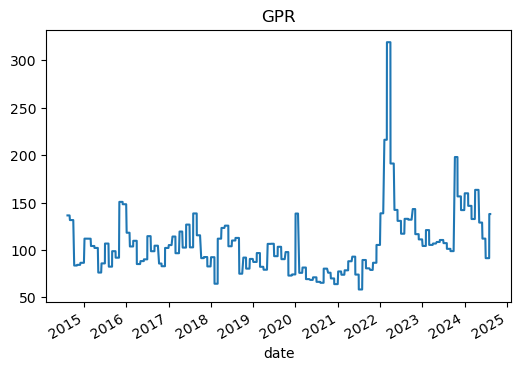

In [99]:
data['GPR'].plot(title='GPR',figsize = (6,4))

<AxesSubplot:title={'center':'GEPU'}, xlabel='date'>

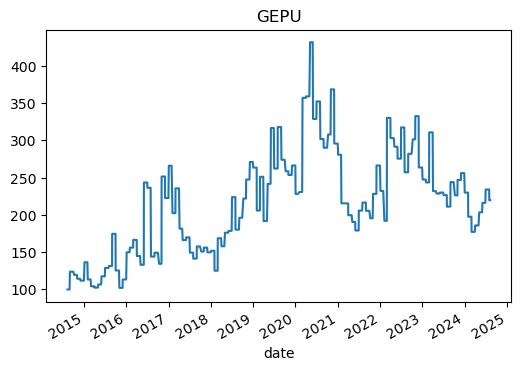

In [100]:
data['GEPU'].plot(title='GEPU',figsize = (6,4))